In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# Задание 5. Среднеквадратическая аппроксимация. Дискретный случай.

Исходная функция

In [115]:
x = symbols('x', real = True)

In [116]:
f = pow(abs(tan(x)), x) * sin(x) + 1 / 2
f

sin(x)*Abs(tan(x))**x + 0.5

Границы отрезка

In [117]:
a = -2
b = 1

График исходной функции

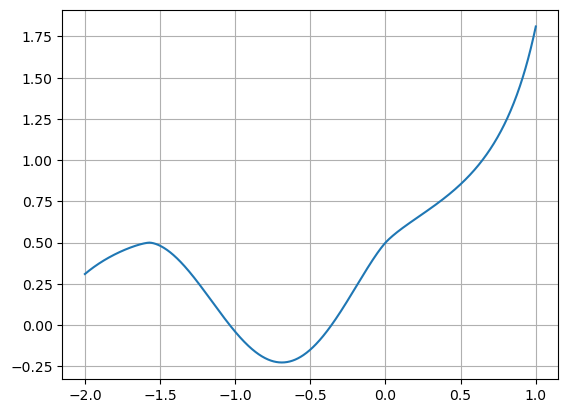

In [118]:
x_vals = np.linspace(a, b, 1000)
plot_f = lambdify(x, f, modules = 'numpy')
plt.plot(x_vals, plot_f(x_vals))
plt.grid(True)

Количество узлов

In [119]:
n = 30

In [120]:
X = [0] * n
Y = [0] * n
for i in range(n):
    X[i] = N(a + (b - a) / (n - 1) * i)
    Y[i] = N(f.subs(x, X[i]))

Базис

In [121]:
m = 6

In [122]:
basis = []
for i in range(m):
    basis.append(x ** i)
basis = Matrix(basis)
basis

Matrix([
[   1],
[   x],
[x**2],
[x**3],
[x**4],
[x**5]])

In [123]:
X = Matrix([[basis[j].subs(x, X[i]) for j in range(m)]for i in range(n)])

In [124]:
Y = Matrix(Y)

Матрица весов

In [125]:
w = Matrix(np.eye(n, dtype=int))

In [126]:
s = (X.transpose() * w * X) ** -1

Вектор коэффициентов

In [127]:
a = s * X.transpose() * w * Y
a

Matrix([
[  0.402684706354867],
[   1.02649798754014],
[-0.0839672327896409],
[ -0.409397578570055],
[  0.520409520818471],
[   0.29508647314012]])

Полученная аппроксимация

In [128]:
g = (Matrix(basis).transpose() * a)[0]
g

0.29508647314012*x**5 + 0.520409520818471*x**4 - 0.409397578570055*x**3 - 0.0839672327896409*x**2 + 1.02649798754014*x + 0.402684706354867

График исходной функции и аппроксимации

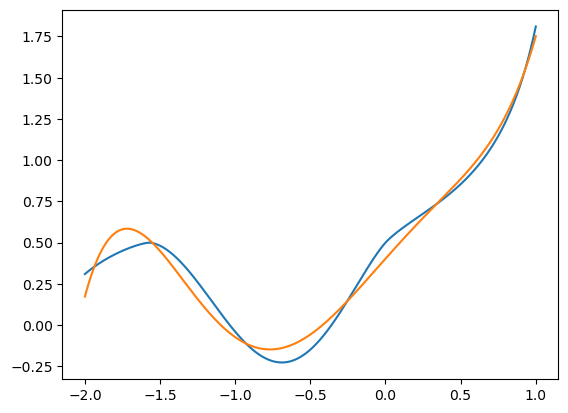

In [129]:
plot_g = lambdify(x, g, modules = 'numpy')
plt.plot(x_vals, plot_f(x_vals))
plt.plot(x_vals, plot_g(x_vals))

Посчитаем ошибку

In [130]:
Y_mean = np.mean(Y)


In [131]:
g = X * a

In [132]:
r_2 = 1 - ((Y - g).transpose() * (Y - g))[0] / sum([(Y[i] - Y_mean) ** 2 for i in range(n)])
r_2

0.979590883524355